# Exercício 5 – Pandas e Matplotlib

Usando as bibliotecas **Pandas** e **MatPlotLib** e um dataset (podes selecionar das aulas, fazer download na plataforma Kaggle ou escolher um dataset pessoal), elabora um notebook Jupyter no qual efetues:

**a.** Limpeza e tratamento de dados

**b.** Processamento de dados: `groupby`, `filter`, criação de novas colunas,…

**c.** Visualização de dados

***

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [20]:
# Pasta para download dos datasets
os.makedirs('data', exist_ok=True)

In [106]:
# dataset pessoal com dados reais de estufa:
# Sample com 13426 linhas (509 617 bytes, 497 KB)
# Big Sample com 221803 linhas (8 538 382 bytes, 8.14 MB)
BIG = False

data_filename_online_sample = 'https://raw.githubusercontent.com/jpedrodias/datasets/refs/heads/main/estufa_fixed.csv'
data_filename_online_big_sample = 'https://raw.githubusercontent.com/jpedrodias/datasets/refs/heads/main/estufa_big_fixed.csv'

if BIG:
    data_filename_online = data_filename_online_big_sample
else:
    data_filename_online = data_filename_online_sample

if BIG:
    data_filename_local = 'data/estufa_big.csv'
else:
    data_filename_local = 'data/estufa.csv'


In [107]:
# Faz download apenas se o ficheiro não existir localmente
if os.path.exists(data_filename_local):
    print(f'Ficheiro de dados encontrado localmente "{data_filename_local}"')
    df = pd.read_csv(data_filename_local)
else:
    print('Ficheiro de dados não encontrado localmente')
    df = pd.read_csv(data_filename_online, sep=';') 
    df.to_csv(data_filename_local, index=False)
    print(f'Ficheiro de dados guardado localmente em "{data_filename_local}"')

Ficheiro de dados encontrado localmente "data/estufa.csv"


***

### Análise incial dos dados do dataset

In [108]:
print('Primeiras linhas do dataset:')
print(df.head())

Primeiras linhas do dataset:
  Carimbo de data/hora  Temperatura (ºC)  Humidade (%)  Pressão (hPa)
0  2020/11/01 00:00:00              16.6          92.3         680.31
1  2020/11/01 00:01:00              16.6          92.2         679.96
2  2020/11/01 00:02:00              16.6          92.3         680.45
3  2020/11/01 00:03:01              16.6          92.3         680.72
4  2020/11/01 00:04:01              16.6          92.2         680.81


In [109]:
# Ver dimensões (linhas, colunas)
print(f'\nDimensões do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas')


Dimensões do dataset: 13426 linhas x 4 colunas


In [110]:
# Ver os nomes e tipos das colunas
print('\nTipos de dados:')
print(df.dtypes)


Tipos de dados:
Carimbo de data/hora     object
Temperatura (ºC)        float64
Humidade (%)            float64
Pressão (hPa)           float64
dtype: object


In [111]:
# Ver se há valores nulos
print('\nValores nulos por coluna:')
print(df.isnull().sum())


Valores nulos por coluna:
Carimbo de data/hora    0
Temperatura (ºC)        0
Humidade (%)            0
Pressão (hPa)           0
dtype: int64


In [112]:
# Ver estatísticas descritivas (média, min, max, etc.)
print('\nEstatísticas descritivas:')
print(df.describe())


Estatísticas descritivas:
       Temperatura (ºC)  Humidade (%)  Pressão (hPa)
count      13426.000000  13426.000000   13426.000000
mean          16.379285     80.167220     676.416942
std            3.367331     15.786889      17.504714
min            1.110000     43.400000     612.350000
25%           14.300000     67.400000     670.760000
50%           15.900000     84.800000     681.220000
75%           17.900000     94.200000     688.327500
max           26.000000    102.400000     704.720000


In [113]:
# Ver a distribuição temporal (mínima e máxima data)
if 'Carimbo de data/hora' in df.columns:
    print('\nIntervalo de datas:')
    print(f'De {df["Carimbo de data/hora"].min()} até {df["Carimbo de data/hora"].max()}')


Intervalo de datas:
De 2020/11/01 00:00:00 até 2020/11/10 09:42:54


***

### Limpeza de tratamento de dados

In [114]:
# Renomear colunas para nomes mais simples (sem acentos nem espaços)
df.columns = ['timestamp', 'temperatura', 'humidade', 'pressao']
print(df.head(2))

             timestamp  temperatura  humidade  pressao
0  2020/11/01 00:00:00         16.6      92.3   680.31
1  2020/11/01 00:01:00         16.6      92.2   679.96


In [115]:
# Converter a coluna 'timestamp' para datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df.head(2))

            timestamp  temperatura  humidade  pressao
0 2020-11-01 00:00:00         16.6      92.3   680.31
1 2020-11-01 00:01:00         16.6      92.2   679.96


In [116]:
# Verifica valores em falta
print('Dados em falta por coluna:')
print(df.isnull().sum())

df.dropna(inplace=True)

Dados em falta por coluna:
timestamp      0
temperatura    0
humidade       0
pressao        0
dtype: int64


***

### Processamento de dados: groupby, filter, criação de novas colunas, ...

In [117]:
# Criar novas colunas: data e hora separadas
df['data'] = df['timestamp'].dt.date

# Comverte a Hora para um número decimal (ex: 14:30 -> 14.5; 14:45 -> 14.75)
df['hora'] = df['timestamp'].dt.hour + df['timestamp'].dt.minute/60 + df['timestamp'].dt.second/3600

In [118]:
print(df.head(5))

            timestamp  temperatura  humidade  pressao        data      hora
0 2020-11-01 00:00:00         16.6      92.3   680.31  2020-11-01  0.000000
1 2020-11-01 00:01:00         16.6      92.2   679.96  2020-11-01  0.016667
2 2020-11-01 00:02:00         16.6      92.3   680.45  2020-11-01  0.033333
3 2020-11-01 00:03:01         16.6      92.3   680.72  2020-11-01  0.050278
4 2020-11-01 00:04:01         16.6      92.2   680.81  2020-11-01  0.066944


In [119]:
# Agrupar por hora e calcular médias
df_horas = df.groupby('hora')[['temperatura', 'humidade', 'pressao']].mean().reset_index()

In [120]:
# Agrupar por dias e calcular médias
df_dias = df.groupby('data')[['temperatura', 'humidade', 'pressao']].mean().reset_index()

In [121]:
print('Médias diárias:')
print(df_dias)

Médias diárias:
         data  temperatura   humidade     pressao
0  2020-11-01    19.487067  81.560071  661.037406
1  2020-11-02    19.235630  83.695546  656.446708
2  2020-11-03    16.465529  60.164136  689.946031
3  2020-11-04    14.202366  61.124215  695.019135
4  2020-11-05    15.786435  75.912674  685.200014
5  2020-11-06    15.541058  86.525748  682.712951
6  2020-11-07    16.370825  86.092741  675.567928
7  2020-11-08    16.881267  91.666295  665.753280
8  2020-11-09    15.935289  87.843112  671.178044
9  2020-11-10    10.238073  97.996007  687.826962


In [122]:
# Valores máximos e mínimos de temperatura, humidade e pressão
df['ano'] = df['timestamp'].dt.year
df['mes'] = df['timestamp'].dt.month
df['dia'] = df['timestamp'].dt.day

df_meses = df.groupby(['ano', 'mes'])[['temperatura', 'humidade', 'pressao']].agg(['min', 'max']).reset_index()
print(df_meses)

    ano mes temperatura       humidade        pressao        
                    min   max      min    max     min     max
0  2020  11        1.11  26.0     43.4  102.4  612.35  704.72


***

### Visualização de dados

In [123]:
df

,timestamp,temperatura,humidade,pressao,data,hora,ano,mes,dia
0,2020-11-01 00:00:00,16.6,92.3,680.31,2020-11-01,0.000000,2020,11,1
1,2020-11-01 00:01:00,16.6,92.2,679.96,2020-11-01,0.016667,2020,11,1
2,2020-11-01 00:02:00,16.6,92.3,680.45,2020-11-01,0.033333,2020,11,1
3,2020-11-01 00:03:01,16.6,92.3,680.72,2020-11-01,0.050278,2020,11,1
4,2020-11-01 00:04:01,16.6,92.2,680.81,2020-11-01,0.066944,2020,11,1
...,...,...,...,...,...,...,...,...,...
13421,2020-11-10 09:36:56,15.0,91.6,677.05,2020-11-10,9.615556,2020,11,10
13422,2020-11-10 09:36:56,14.9,91.9,677.67,2020-11-10,9.615556,2020,11,10
13423,2020-11-10 09:36:56,14.8,92.0,678.44,2020-11-10,9.615556,2020,11,10
13424,2020-11-10 09:36:56,14.9,92.0,678.21,2020-11-10,9.615556,2020,11,10


# 📈 Gráfico por dia

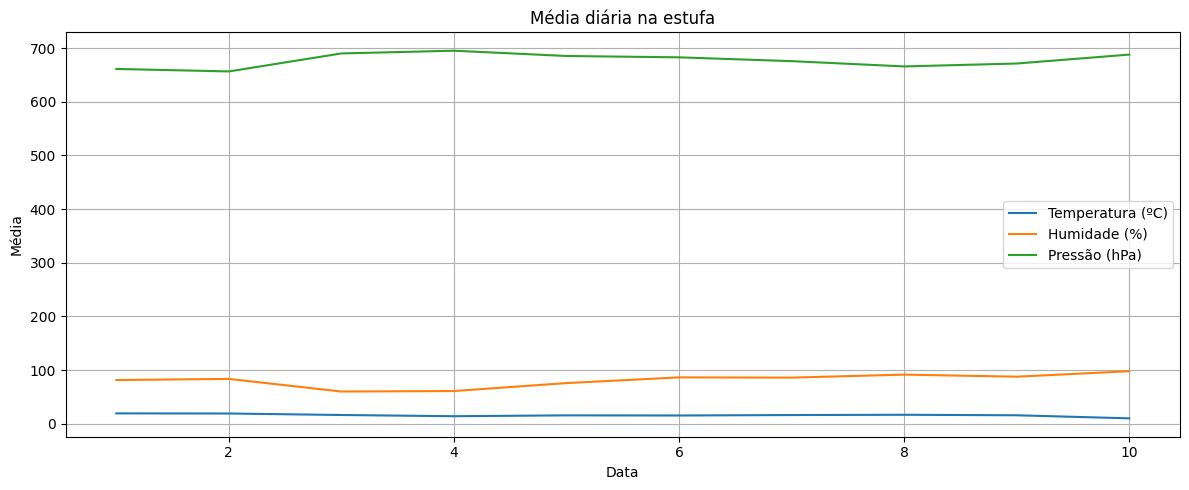

In [124]:
df_dia = df.groupby('dia')[['temperatura', 'humidade', 'pressao']].mean()

plt.figure(figsize=(12, 5))
plt.plot(df_dia.index, df_dia['temperatura'], label='Temperatura (ºC)')
plt.plot(df_dia.index, df_dia['humidade'], label='Humidade (%)')
plt.plot(df_dia.index, df_dia['pressao'], label='Pressão (hPa)')
plt.title('Média diária na estufa')
plt.xlabel('Data')
plt.ylabel('Média')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 Gráfico por mês

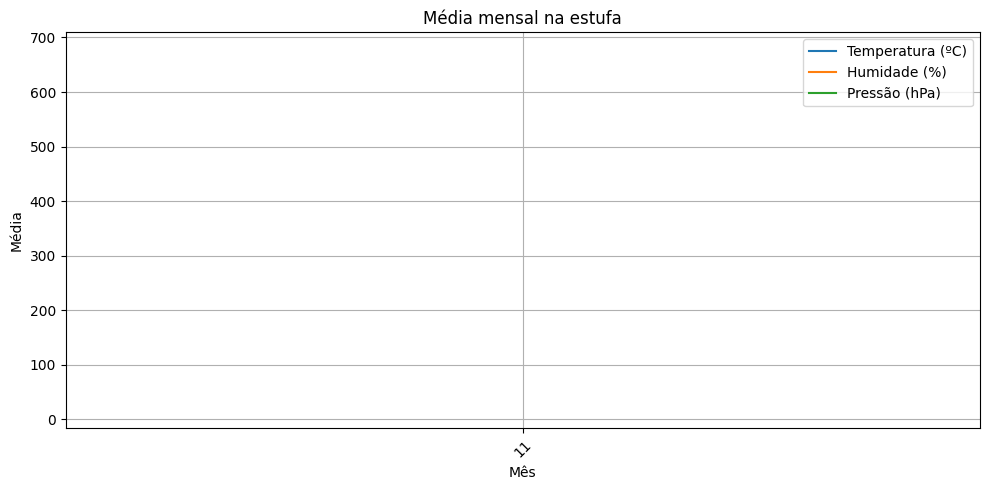

In [125]:
df_mes = df.groupby('mes')[['temperatura', 'humidade', 'pressao']].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_mes.index.astype(str), df_mes['temperatura'], label='Temperatura (ºC)')
plt.plot(df_mes.index.astype(str), df_mes['humidade'], label='Humidade (%)')
plt.plot(df_mes.index.astype(str), df_mes['pressao'], label='Pressão (hPa)')
plt.title('Média mensal na estufa')
plt.xlabel('Mês')
plt.ylabel('Média')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Gráfico média por ano

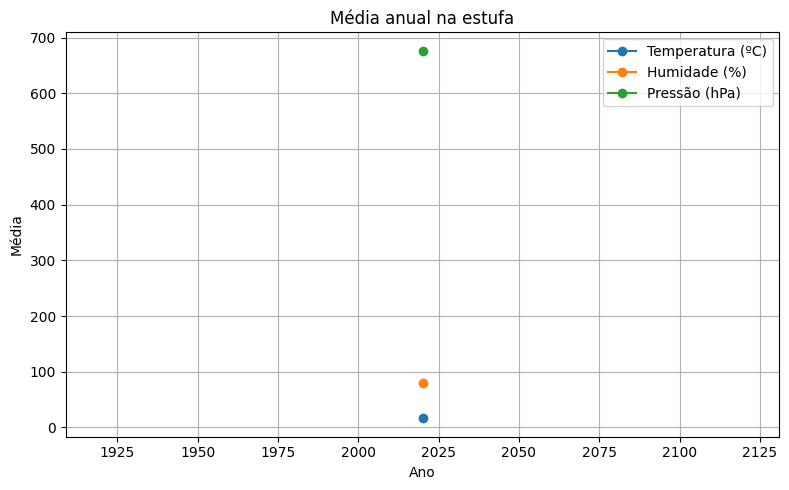

In [126]:
df_ano = df.groupby('ano')[['temperatura', 'humidade', 'pressao']].mean()

plt.figure(figsize=(8, 5))
plt.plot(df_ano.index, df_ano['temperatura'], marker='o', label='Temperatura (ºC)')
plt.plot(df_ano.index, df_ano['humidade'], marker='o', label='Humidade (%)')
plt.plot(df_ano.index, df_ano['pressao'], marker='o', label='Pressão (hPa)')
plt.title('Média anual na estufa')
plt.xlabel('Ano')
plt.ylabel('Média')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 Gráfico temporar total

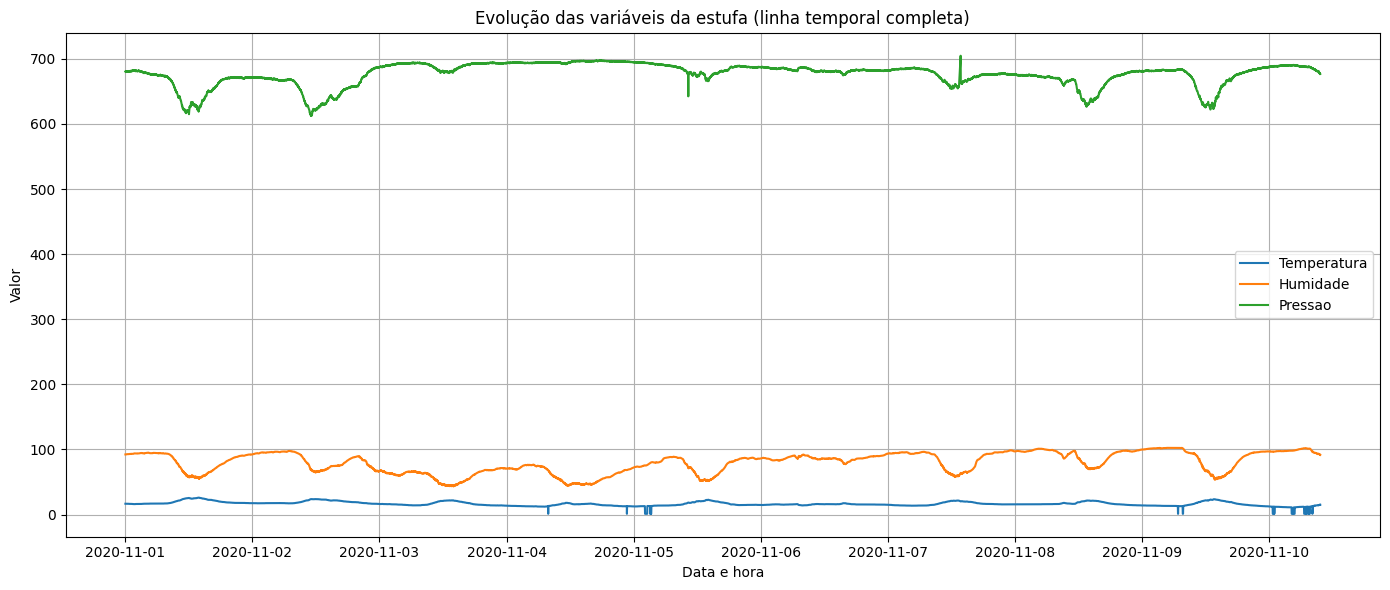

In [127]:
# Define o timestamp como índice (opcional, mas útil)
df = df.set_index('timestamp')

# Seleciona as colunas numéricas para o gráfico
variaveis = ['temperatura', 'humidade', 'pressao']

# Criação do gráfico
plt.figure(figsize=(14, 6))
for var in variaveis:
    plt.plot(df.index, df[var], label=var.capitalize())

plt.title('Evolução das variáveis da estufa (linha temporal completa)')
plt.xlabel('Data e hora')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***